# Analysis of Amazon Sales Transactions in India (March to June 2022)

**Name:** Mou Sarkar    

**Organization:** InnoByte Services 

## Introduction

* The dataset contains information about sales transactions on Amazon in India from March to June 2022. It includes details such as order ID, date, status, fulfillment method, sales channel, product category, size, quantity, amount, shipping details, and more.

## Problem Statement

* Analyze and Provide Insights on Amazon Sales Report .

## Size of Dataset

* The size of the data is 19.1 MB.

## About the Dataset

* The dataset comprises sales transactions on Amazon India spanning from March to June 2022.
* The dataset contains 20 columns namely - index, Order ID, Date, Status, Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS.

## Libraries Used
* Numpy
* Pandas
* Matplotlib
* Seaborn
* Scikit-learn

## Overview of the Features

* index: The unique identifier for each row.
* Order ID: The unique identifier for each order.
* Date: The date when the order was placed.
* Status: The current status of the order .
* Fulfilment: The fulfillment method used for the order.
* Sales Channel: The channel through which the sale was made .
* ship-service-level: The shipping service level selected for the order.
* Category: The product category of the item(s) in the order.
* Size: The size of the product (if applicable).
* Courier Status: The current status of the courier .
* currency: The currency in which the transaction was made.
* Amount: The monetary value of the order.
* ship-city: The city to which the order is shipped.
* ship-state: The state to which the order is shipped.
* ship-postal-code: The postal code for the shipping address.
* ship-country: The country to which the order is shipped.
* B2B: Indicates if the order is a business-to-business (B2B) transaction.
* fulfilled-by: Indicates who fulfilled the order .
* New: Potentially a column to indicate if the product is new.
* Pendings: The number of pending items or status within the order.

## Data Preprocessing

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding='latin-1')

In [3]:
# The first few rows of the dataframe
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
# The last few rows of the dataframe
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
## Random sample of 3 rows from the DataFrame
df.sample(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
90859,90858,403-5723201-1217900,05-01-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,666.0,NAGERCOIL,TAMIL NADU,629003.0,IN,False,NaN,NaN,NaN
76771,76770,406-5926611-3789145,05-09-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,INR,524.0,AKHNOOR,JAMMU & KASHMIR,181201.0,IN,False,NaN,NaN,NaN
116658,116657,403-5508238-2990709,06-09-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,3XL,Shipped,...,INR,735.0,mumbai,MAHARASHTRA,400008.0,IN,False,Easy Ship,NaN,NaN


In [6]:
# Shape of the data
df.shape

(128976, 21)

In [7]:
# Total size of the data
df.size

2708496

In [8]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
# Checking number of unique values of each columns
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

In [10]:
df["Status"].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [11]:
df["Fulfilment"].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [12]:
df["Sales Channel"].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [13]:
df["ship-service-level"].unique()

array(['Standard', 'Expedited'], dtype=object)

In [14]:
df["Category"].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [15]:
df["Size"].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [16]:
df["ship-state"].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [17]:
df['ship-city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [18]:
df["Courier Status"].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [19]:
df["B2B"].unique()

array([False,  True])

In [20]:
### replace value

In [21]:
replacement_dict = {
    ('Goa', 'goa'): 'GOA',
    ('Delhi', 'delhi', 'New Delhi'): 'DELHI',
    ('Rajshthan', 'Rajasthan', 'Rajsthan', 'rajsthan', 'rajasthan', 'RJ'): 'RAJASTHAN',
    ('Punjab', 'punjab', 'Punjab/Mohali/Zirakpur', 'PB', 'Chandigarh', 'CHANDIGARH'): 'PUNJAB',
    'Manipur': 'MANIPUR',
    ('Odisha', 'orissa', 'Orissa'): 'ODISHA',
    ('NL', 'Nagaland'): 'NAGALAND',
    ('bihar', 'Bihar'): 'BIHAR',
    ('Puducherry', 'Pondicherry', 'PUDUCHERRY'): 'TAMIL NADU',
    'Mizoram': 'MIZORAM',
    ('Arunachal Pradesh', 'Arunachal pradesh', 'AR'): 'ARUNACHAL PRADESH',
    'APO': 'ANDHRA PRADESH',
    'Meghalaya':'MEGHALAYA',
    'Sikkim':'SIKKIM',
    'Gujarat': 'GUJARAT'}

In [22]:
def replace_multiple(df, column, replacements):
    for keys, value in replacements.items():
        if isinstance(keys, tuple):
            df["ship-state"] = df["ship-state"].replace(keys, value)
        else:
            df["ship-state"] = df["ship-state"].replace(keys, value)
    return df

In [23]:
df = replace_multiple(df, 'ship-state', replacement_dict)


In [24]:
df ['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',
       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'GUJARAT',
       'UTTARAKHAND', 'BIHAR', 'JAMMU & KASHMIR', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'LAKSHADWEEP'], dtype=object)

In [25]:
# checking null values 
df.isna().sum()/len(df)*100

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by           69.557902
New                   100.000000
PendingS              100.000000
dtype: float64

### Handing missing values

In [26]:
# Dropping the columns New,PendingS,fulfilled-by,currency,ship-country
df.drop(["New","PendingS","fulfilled-by","currency","ship-country"],axis=1,inplace=True)

* Dropped the columns that I did not need for the analyze.
* I dropped columns New,PendingS,fulfilled-by and currency.

In [27]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,TAMIL NADU,605008.0,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False


In [28]:
# Replancing missing value of Amount column with median
df["Amount"].fillna(df["Amount"].median(),inplace=True)

In [29]:
# Dropping missing value row wise
df.dropna(inplace=True)

* New,PendingS,fulfilled-by columns had a lot of missing data.
  So I decided to drop the column.

* Amount column had 6% missing data. So I replaced the missing values of Amount column with Median of Amount.

* ship-city ,ship-state,ship-postal-code columns had 0.27% of missing data.
  So I dropped remianing missing data of the entire dataframe rowwise

In [30]:
# Again check missing in each column 
df.isna().sum()/len(df)*100

index                 0.0
Order ID              0.0
Date                  0.0
Status                0.0
Fulfilment            0.0
Sales Channel         0.0
ship-service-level    0.0
Category              0.0
Size                  0.0
Courier Status        0.0
Qty                   0.0
Amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
B2B                   0.0
dtype: float64

In [31]:
# Checking duplicate values
df.duplicated().sum()

166

In [32]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [33]:
# Below are the Remaining columns after handling missing values.
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

In [34]:
# Change data type
df['ship-postal-code']= df['ship-postal-code'].astype('int')

In [35]:
# Checking whether data type change or not
df["ship-postal-code"].dtype

dtype('int32')

In [36]:
# Converting the 'date' column to a datetime format
df['Date']= pd.to_datetime(df['Date'],errors='coerce')

In [37]:
# Rename column
df.rename(columns={"Qty":"Quantity"},inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128775 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128775 non-null  int64         
 1   Order ID            128775 non-null  object        
 2   Date                128775 non-null  datetime64[ns]
 3   Status              128775 non-null  object        
 4   Fulfilment          128775 non-null  object        
 5   Sales Channel       128775 non-null  object        
 6   ship-service-level  128775 non-null  object        
 7   Category            128775 non-null  object        
 8   Size                128775 non-null  object        
 9   Courier Status      128775 non-null  object        
 10  Quantity            128775 non-null  int64         
 11  Amount              128775 non-null  float64       
 12  ship-city           128775 non-null  object        
 13  ship-state          128775 no

In [39]:
# checking columns name after rename column
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

In [40]:
# the descriptive statistics of the data
df.describe()

,index,Quantity,Amount,ship-postal-code
count,128775.000000,128775.000000,128775.000000,128775.00000
mean,64564.787948,0.904430,646.004662,463957.07107
std,37192.505842,0.313359,272.797676,191478.52940
min,0.000000,0.000000,0.000000,110001.00000
25%,32371.500000,1.000000,459.000000,382421.00000
50%,64569.000000,1.000000,605.000000,500033.00000
75%,96772.500000,1.000000,771.000000,600024.00000
max,128974.000000,15.000000,5584.000000,989898.00000


## Exploratory Data Analysis

## 1) Sales Overview: Understand the overall sales performance, trends, and patterns over time.

In [41]:
# Extract week,year,month and day
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [42]:
#Create a 'Total Sales' column
df['Total Sales'] = df['Amount'] * df['Quantity']

In [43]:
#replace column value
df['Month']=df['Month'].replace({3:'March',4:'April',5:'May',6:'June'})

In [44]:
# Day name return

In [45]:
import datetime

def int_to_dayname(Day):
    reference_date = datetime.date(2022, 3, 1)   
    actual_date = reference_date + datetime.timedelta(days=Day - 1)    
    return actual_date.strftime('%A')

In [46]:
#'Day_name' column create
df['Day_name'] = df['Day'].apply(int_to_dayname)

In [47]:
df['Total Sales in Million']= df['Total Sales']/ 1000000
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,B2B,Week,Year,Day,Month,Total Sales,Day_name,Total Sales in Million
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081,False,17,2022,30,April,0.0,Wednesday,0.000000
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085,False,17,2022,30,April,406.0,Wednesday,0.000406
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210,True,17,2022,30,April,329.0,Wednesday,0.000329
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,TAMIL NADU,605008,False,17,2022,30,April,0.0,Wednesday,0.000000
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073,False,17,2022,30,April,574.0,Wednesday,0.000574


### Total Sales Over Time and daily sales trend

In [48]:
daily_sales= df.groupby('Date')['Total Sales in Million'].sum().reset_index()

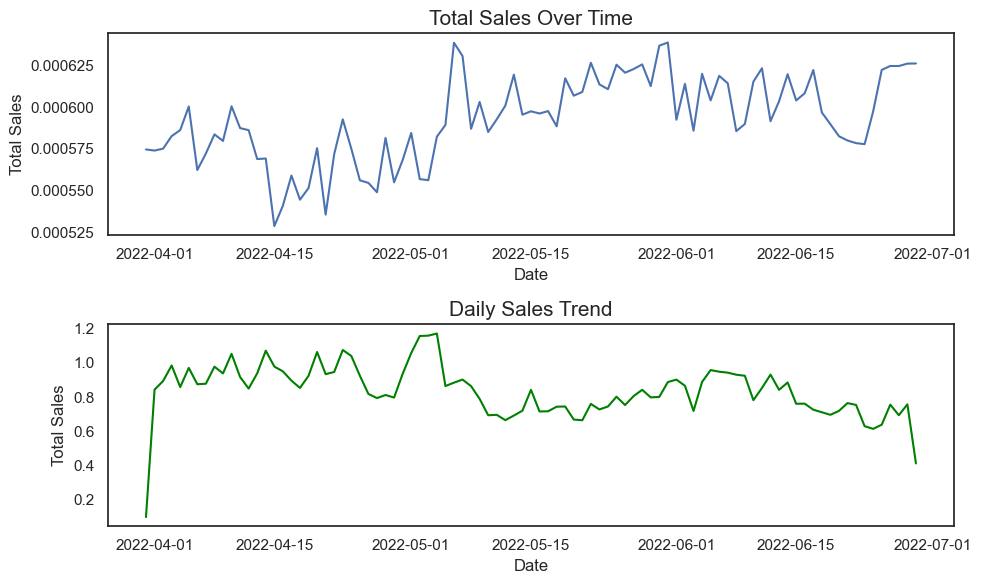

In [49]:
plt.figure(figsize=(10, 6))
sns.set(style='white')
plt.subplot(2,1,1)
sns.lineplot(data=df, x='Date', y='Total Sales in Million', ci=None)
plt.title('Total Sales Over Time',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)
plt.subplot(2,1,2)
sns.lineplot(data=daily_sales, x='Date', y='Total Sales in Million',color= 'green')
plt.title('Daily Sales Trend',fontsize=15)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)
plt.tight_layout()
plt.show()

### Total Sales Over  Time:
##### Key Findings
* From the first graph we can see that, The sales peak significantly around early May and mid-June.There is a general upward trend in sales from April to mid-May and Sales seem to stabilize towards the end of June ,but sales seem low during late april and early june.
##### Recommendations
* Investigate the reasons behind the sales peaks in early May and mid-June. If they coincide with marketing campaigns or promotions, consider replicating these strategies during other periods.
* Plan special promotions, discounts, or marketing campaigns during these peak periods to further boost sales.
* Implement strategies to increase sales during off-peak periods (e.g., late April and early June). This could involve targeted marketing, bundling products, or offering limited-time discounts.
* Consider using social media and email marketing to reach customers during these slower periods with personalized offers.


### Daily Sales Trend:
#### Key Findings
* From the above second graph we can observe that, a Sharp increase at the beginning of April, likely due to a major event or promotion.High and stable sales from early April to mid-May, with a significant peak in early May.Noticeable decline from mid-May to early June, with lowest sales at the end of June.
#### Recommendations
* Identify and replicate successful strategies from early April and early May.
* Extend successful promotions and introduce follow-up campaigns to maintain post-peak sales.
* Introduce targeted promotions, flash sales, and product bundles during slow periods.
* Use personalized marketing, loyalty programs, and exclusive offers to drive repeat purchases.

### Monthly Sales trend 

In [50]:
monthly_sales= df.groupby('Month')['Total Sales in Million'].sum().reset_index()

In [51]:
monthly_sales

,Month,Total Sales in Million
0,April,27.805861
1,June,22.776386
2,March,0.098261
3,May,25.344862


Text(0, 0.5, 'Total Sales')

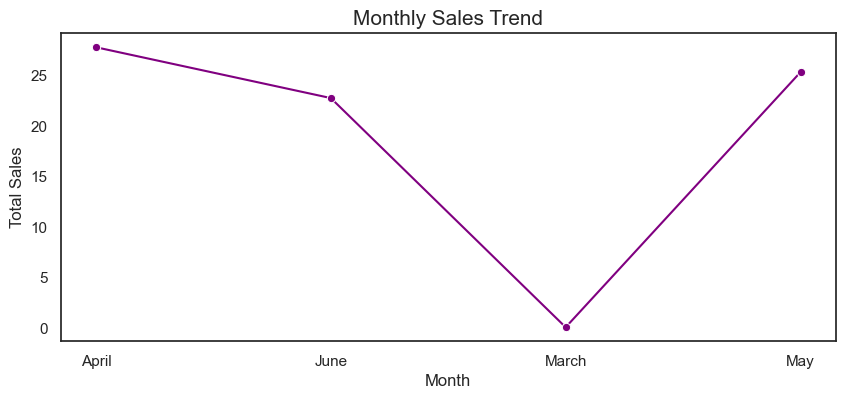

In [52]:
plt.figure(figsize=(10,4))
sns.set(style='white')
sns.lineplot(x='Month', y='Total Sales in Million', data=monthly_sales, color='Purple', marker='o')
plt.title("Monthly Sales Trend",fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)

#### Key Findings 
* April and May show the highest sales and June shows a moderate decline in sales from April and May but remains higher than March.March has the lowest sales, indicating a sharp decline.
#### Recommendations
* Analyze the factors contributing to high sales in April and May (e.g., promotions, marketing campaigns) and replicate these strategies in other months.
* Investigate the reasons behind the significant drop in March and address any identified issues.Introduce targeted promotions or marketing campaigns in March to boost sales.
* Consider launching new product lines or special offers in June to attract customers.Extend successful promotions from April and May into June to sustain higher sales.

### Weekly Sales Trend and Sales by  day of the week

In [53]:
weekly_sales=df.groupby('Week') ['Total Sales in Million'].sum().reset_index().sort_values('Total Sales in Million', ascending= False)
weekly_sales

,Week,Total Sales in Million
5,18,7.005260
3,16,6.840369
2,15,6.604734
1,14,6.553733
10,23,6.315305
4,17,6.141171
9,22,6.023705
8,21,5.476505
11,24,5.385475
6,19,5.100345


In [54]:
weekly_sales['Week']= weekly_sales['Week'].astype('str')

In [55]:
weekday_sales= df.groupby('Day_name')['Total Sales in Million'].sum().reset_index().sort_values('Total Sales in Million', ascending= False)
weekday_sales

,Day_name,Total Sales in Million
5,Tuesday,12.628818
6,Wednesday,12.170677
4,Thursday,11.119816
1,Monday,10.179061
0,Friday,10.062556
2,Saturday,9.935046
3,Sunday,9.929396


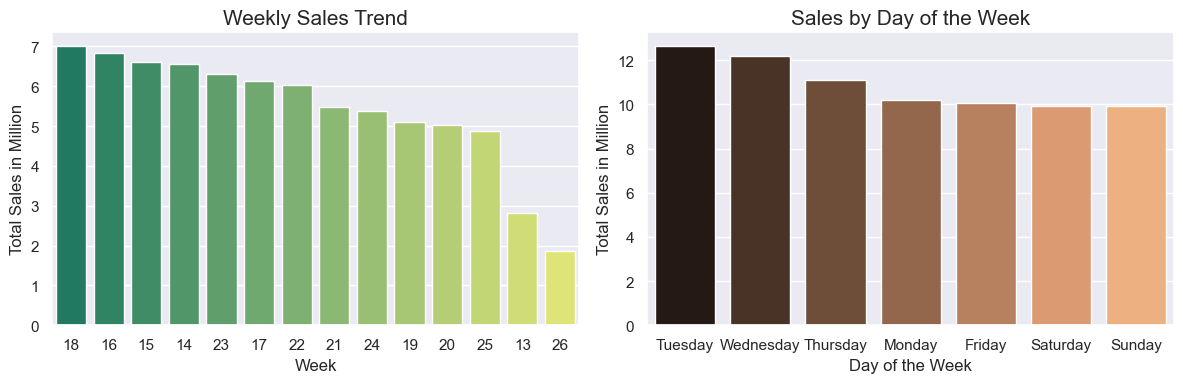

In [56]:
plt.figure(figsize=(12,4))
sns.set(style='darkgrid')
plt.subplot(1,2,1)
sns.barplot(x='Week', y='Total Sales in Million',data=weekly_sales,palette='summer')
plt.title('Weekly Sales Trend',fontsize=15)
plt.xlabel('Week',fontsize=12)
plt.ylabel('Total Sales in Million',fontsize=12)
sns.set(style='darkgrid')

plt.subplot(1,2,2)
sns.barplot(x='Day_name', y='Total Sales in Million',data=weekday_sales,palette='copper')
plt.title('Sales by Day of the Week',fontsize=15)
plt.xlabel('Day of the Week',fontsize=12)
plt.ylabel('Total Sales in Million',fontsize=12)
plt.tight_layout()
plt.show()

### Weekly Sales Trend:
##### Key Findings

* The highest sales were recorded in Week 18, followed closely by Weeks 16, 15, and 14.
* There is a noticeable decline in sales from Week 23 onwards and Week 26 had the lowest sales.
##### Recommendations
* Analyze the factors contributing to the high sales in Weeks 18 to 15. This could include promotional activities, holidays, or other external factors.Implement similar strategies in weeks with lower sales to boost performance.
* Investigate potential causes for the significant decline in sales starting from Week 23. This could involve changes in market conditions, customer behavior, or internal factors like stock availability.Consider implementing targeted marketing campaigns or promotions to revive sales during these weeks.

### Sales by Day of the Week:
##### Key Findings

* Sales are highest on Tuesdays, followed closely by Wednesdays and Thursdays. Sales on Fridays, Mondays, Saturdays, and Sundays are relatively lower but remain consistent.
##### Recommandations
* Take strategies to boost sales on Fridays, Saturdays, and Sundays such as weekend-specific discounts, special offers etc.  
* Explore partnerships or collaborations that can attract more customers during the weekend. 

## 2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular products. 


###  Analyze product category distribution

In [57]:
category_dist=df['Category'].value_counts()
category_dist    

T-shirt     50207
Shirt       49786
Blazzer     15488
Trousers    10605
Perfume      1157
Wallet        926
Socks         439
Shoes         164
Watch           3
Name: Category, dtype: int64

### Product size distribution

In [58]:
size_counts = df['Size'].value_counts()
size_counts

M       22343
L       21768
XL      20516
XXL     17780
S       16748
3XL     14625
XS      11032
Free     2250
6XL       738
5XL       550
4XL       425
Name: Size, dtype: int64

### Popular product by category and size

In [59]:
quantity_sold= df.groupby(['Category','Size'])['Quantity'].sum().reset_index()
popular_product=quantity_sold.nlargest(5, 'Quantity')
popular_product

,Category,Size,Quantity
31,T-shirt,M,8346
12,Shirt,L,8031
15,Shirt,XL,7825
13,Shirt,M,7699
30,T-shirt,L,7385


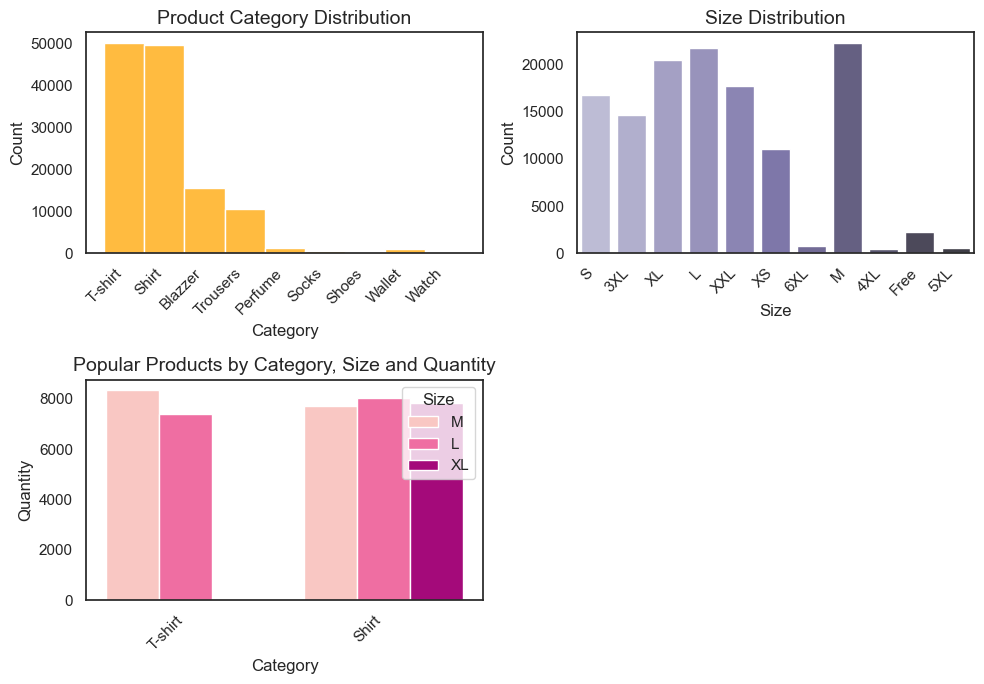

In [60]:
plt.figure(figsize=(10,7))
sns.set(style='white')
plt.subplot(2,2,1)
sns.histplot(x='Category',data=df,color='orange')
plt.title('Product Category Distribution',fontsize=14)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=45,ha='right')

plt.subplot(2,2,2)
sns.countplot(x='Size',data=df,palette='Purples_d')
plt.title('Size Distribution', fontsize=14)
plt.xlabel("Size", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,3)
sns.barplot(x='Category',y='Quantity',data=popular_product,hue='Size',palette='RdPu',saturation=0.9)
plt.title('Popular Products by Category, Size and Quantity', fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Key Findings

##### Product Category Distribution
* T-shirts and Shirts are the most popular categories compare to other categories.
* Socks, Shoes, Socks, Wallets, and Watches are the least popular categories.
##### Size Distribution
* Sizes L (Large) and M (Medium) are the most popular, followed by XL (Extra Large).
* Sizes such as 4XL, Free Size, and 5XL have very low counts, indicating minimal demand.
##### Popular Products by Category ,Size and Quantity
* T-shirts are most popular in size M, followed by L and XL.
* Shirts have a similar pattern with sizes M, L, and XL being the most popular.

#### Insights  on product preferences
* T-shirts and shirts dominate the product preferences.
* Focus on stocking sizes L, XL, and M to meet the majority of customer demand.
* Consider targeted marketing for less popular categories and sizes.

## 3. Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders.

 #### Distribution of fulfillment

In [61]:
fulfillment_dist = df['Fulfilment'].value_counts().reset_index()
fulfillment_dist

,index,Fulfilment
0,Amazon,89575
1,Merchant,39200


#### Success Rate Analysis 

In [62]:
#Calculate success rate for each fulfillment method
success_rate =df[(df['Status'] == 'Shipped - Delivered to Buyer') | (df['Status']=='Shipped')].groupby('Fulfilment').size() / df.groupby('Fulfilment').size()*100
Sr=success_rate.reset_index(name='Success rate')

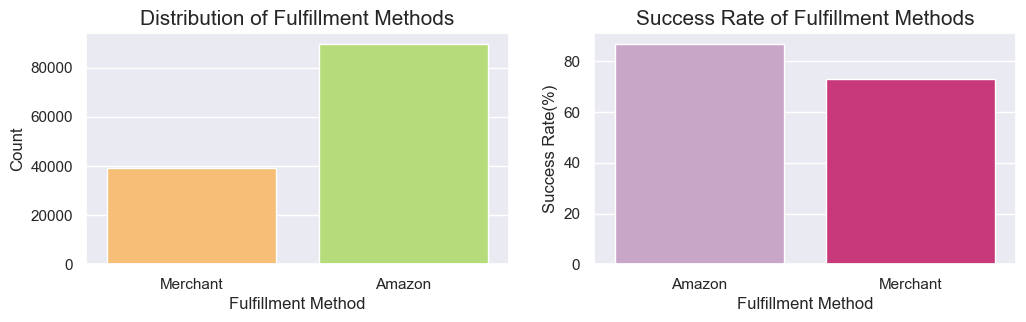

In [63]:
plt.figure(figsize=(12,3))
sns.set(style='darkgrid')
plt.subplot(1,2,1)
sns.countplot(data=df, x='Fulfilment',palette='RdYlGn',saturation=0.9)
plt.title('Distribution of Fulfillment Methods',fontsize=15)
plt.xlabel('Fulfillment Method',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='Fulfilment',y='Success rate',data=Sr,palette='PuRd')
plt.title('Success Rate of Fulfillment Methods',fontsize=15)
plt.xlabel('Fulfillment Method',fontsize=12)
plt.ylabel('Success Rate(%)',fontsize=12)
plt.show()

### Key Findings
### Distribution of Fulfillment Methods:
* Amazon Fulfillment: Dominates with around 80,000 orders.
* Merchant Fulfillment: Significantly fewer with around 40,000 orders.
### Success Rate of Fulfillment Methods:
* Amazon Fulfillment: Approximately 80% success rate.
* Merchant Fulfillment: Approximately 70% success rate.

### Insights for Improving Customer Satisfaction
* Use Amazon fulfillment for key products to ensure quick delivery.
* Provide special customer support for issues with merchant-fulfilled orders to resolve problems quickly.
* Conduct regular performance reviews of both Amazon and merchant fulfillment methods. Identify trends and fix any issues early.

### Recommendations:
##### Inventory Management:
* Focus on allocating more inventory to Amazon fulfillment centers for better order fulfillment.
* Keep enough stock at Amazon centers to meet high demand and avoid stockouts. Use data to forecast and adjust inventory.
* Work with merchants to improve their fulfillment processes, ensuring they adhere to Amazon's fulfillment standards. Provide training and resources to improve their efficiency and success rates.
##### Customer Service:
* Inform customers about the fulfillment method and delivery times at purchase. Offer real-time order updates.
* Simplify the return and exchange process, especially for orders fulfilled by merchants, to enhance customer trust and satisfaction.
* Implement a system for customers to rate their fulfillment experience. Use feedback to improve and reward top fulfillment partners.

## 4. Customer Segmentation: Segment customers based on their buying behavior, location, and other relevant factors.

In [64]:
##  Feature Engineering
# Calculate total amount spent by each customer

In [65]:
customer_df = df.groupby('Order ID').agg({
    'Amount': 'sum',
    'Quantity': 'sum',
    'ship-city': 'first',
    'ship-state': 'first',
    'ship-postal-code': 'first',
    'B2B': 'first'
}).reset_index()

In [66]:
# Rename columns for clarity
customer_df.rename(columns={
    'Amount': 'Total Amount Spent',
    'Quantity': 'Total Quantity Purchased'
}, inplace=True)

In [67]:
# Print the new dataframe
print(customer_df.head())

              Order ID  Total Amount Spent  Total Quantity Purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  
0  PIMPRI CHINCHWAD    MAHARASHTRA            412101  False  
1            Howrah    WEST BENGAL            711104  False  
2             KODAD      TELANGANA            508206  False  
3     GREATER NOIDA  UTTAR PRADESH            201306  False  
4         FIROZABAD  UTTAR PRADESH            283203  False  


In [68]:
# Segmentation using Clustering

In [69]:
# Select features for clustering
features = customer_df[['Total Amount Spent', 'Total Quantity Purchased']]


In [70]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [71]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


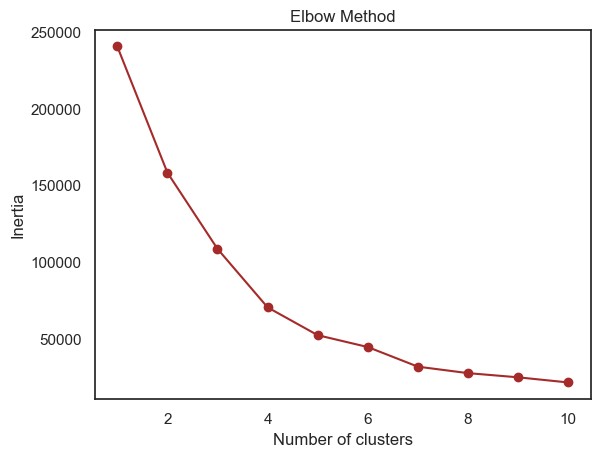

In [72]:
# Plot the elbow curve
sns.set(style='white')
plt.plot(range(1, 11), inertia, marker='o',color='brown')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


* The elbow in the plot is around 3 clusters. This suggests that using 3 clusters is a reasonable choice for segmenting the customers.

In [73]:
# Choose the optimal number of clusters 
optimal_clusters = 3

In [74]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [75]:
print(customer_df.head())

              Order ID  Total Amount Spent  Total Quantity Purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  Cluster  
0  PIMPRI CHINCHWAD    MAHARASHTRA            412101  False        0  
1            Howrah    WEST BENGAL            711104  False        0  
2             KODAD      TELANGANA            508206  False        0  
3     GREATER NOIDA  UTTAR PRADESH            201306  False        0  
4         FIROZABAD  UTTAR PRADESH            283203  False        0  


In [76]:
# Analyze and Interpret the Segments
#Analyze the characteristics of each cluster to understand the segments.

In [77]:
# Analyze the clusters
cluster_analysis = customer_df.groupby('Cluster').agg({
    'Total Amount Spent': ['mean', 'sum'],
    'Total Quantity Purchased': ['mean', 'sum'],
    'ship-city': 'count',
    'ship-state': 'first',
    'ship-postal-code': 'first',
    'B2B': 'first'
}).reset_index()

In [78]:
# Rename columns for clarity
cluster_analysis.columns = [ 'Avg Amount Spent', 'Total Amount Spent', 
                            'Avg Quantity Purchased', 
                            'Total Quantity Purchased', 'Customer Count', 
                            'Representative City',
                            'Representative State', 
                            'Representative Postal Code', 'B2B']


In [79]:
# Print the cluster analysis
cluster_analysis

,Avg Amount Spent,Total Amount Spent,Avg Quantity Purchased,Total Quantity Purchased,Customer Count,Representative City,Representative State,Representative Postal Code,B2B
0,0,649.00000,66379720.00,1.006130,102907,102280,MAHARASHTRA,412101,False
1,1,645.36512,7697269.79,0.000000,0,11927,GUJARAT,382424,False
2,2,1520.23033,9112260.60,2.262429,13561,5994,GUJARAT,380015,False


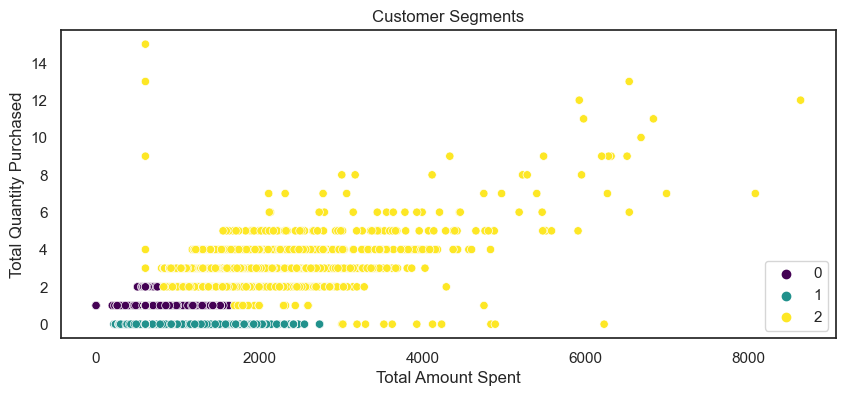

In [80]:
plt.figure(figsize=(10,4))
sns.set(style='white')
sns.scatterplot(x='Total Amount Spent', y='Total Quantity Purchased', hue='Cluster',
                data=customer_df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity Purchased')
plt.legend(loc='lower right')
plt.show()

### Key Findings:
##### Cluster Distribution:
* Cluster 0 (Purple): Low spenders, infrequent buyers.
* Cluster 1 (Green): Moderate spenders, low frequency.
* Cluster 2 (Yellow): High spenders, frequent buyers with diverse spending patterns.
##### customers Behavior:
* Cluster 0:Spend less and buy fewer items. May need more incentives to spend more.
* Cluster 1: Also spend less and buy fewer items, but with slightly different buying habits than Cluster 0.
* Cluster 2: Most diverse spending, including highest spenders and large quantity buyers. They are likely the most valuable customers.
 ### Insights  
##### High Spenders and Frequent Buyers (Cluster 2):

* This group spends a wide range of amounts.
* They are key to revenue, ideal for loyalty programs and special promotions.
##### Moderate and Low Spenders (Clusters 0 and 1):

* These groups spend and buy less.
* They might be sensitive to price and may respond well to discounts and promotional offers.
* Use personalized marketing, targeted discounts, and incentives to boost their spending.

## 5. Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities.


In [82]:
top_State_sales= df.groupby('ship-state')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).head(5)
top_State_sales

,ship-state,Total Sales in Million
19,MAHARASHTRA,12.921668
14,KARNATAKA,10.208746
29,TELANGANA,6.699150
31,UTTAR PRADESH,6.553145
28,TAMIL NADU,6.505236


In [91]:
bottom_sales_state= df.groupby('ship-state')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).tail(5)
bottom_sales_state

,ship-state,Total Sales in Million
30,TRIPURA,0.086799
22,MIZORAM,0.039605
6,DADRA AND NAGAR,0.039276
16,LADAKH,0.036737
17,LAKSHADWEEP,0.002441


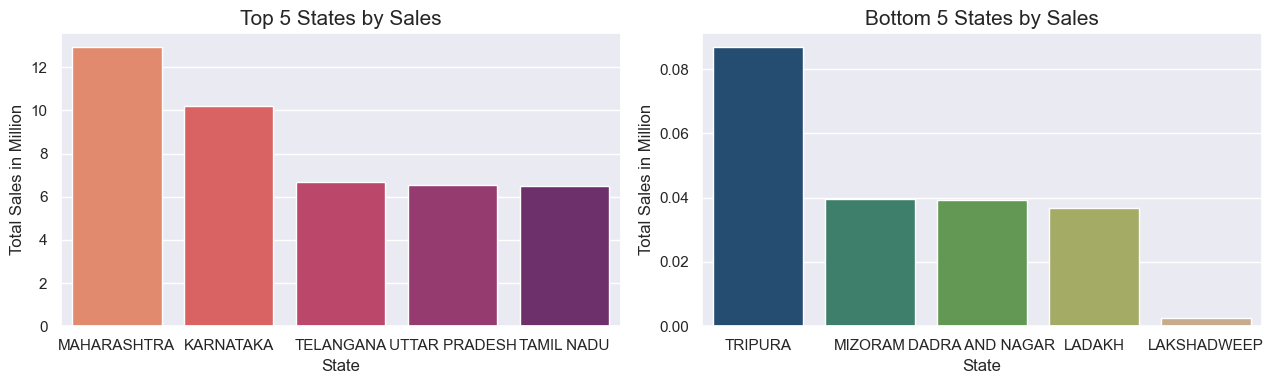

In [85]:
plt.figure(figsize=(13,4))
sns.set(style='darkgrid')
plt.subplot(1,2,1)
sns.barplot(x='ship-state',y='Total Sales in Million',data=top_State_sales,palette='flare',saturation=0.9)
plt.title('Top 5 States by Sales',fontsize=15)
plt.ylabel('Total Sales in Million',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='ship-state',y='Total Sales in Million',data=bottom_sales_state,palette='gist_earth',saturation=0.8)
plt.title('Bottom 5 States by Sales',fontsize=15)
plt.ylabel('Total Sales in Million',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.tight_layout()

### Key Findings:
##### Top 5 States by Sales:
* Maharashtra leads with the highest total sales, exceeding 12 million.
* Karnataka follows, with sales around 10 million.
* Telangana, Uttar Pradesh, and Tamil Nadu each have significant sales figures, ranging between approximately 7 to 9 million.
##### Bottom 5 States by Sales:
* Lakshadweep has the lowest sales, close to negligible.
* Ladakh, Dadra and Nagar Haveli, Mizoram, and Tripura have relatively low sales, all below 0.1 million.

### Insights:
* Maharashtra and Karnataka are crucial due to higher population density and purchasing power.
* Focus on strategies to deepen market penetration in these high-performing regions.
* Low sales in Lakshadweep and Ladakh could indicate either a lack of market presence or lower market potential.
* Assess whether to invest in market development or focus resources elsewhere.
* Implement targeted sales approaches for high-performing regions.
* Develop customized plans for improving market presence in low-performing states.

In [86]:
top_sales_cities= df.groupby('ship-city')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million',ascending=False).head(10)

In [87]:
top_sales_cities

,ship-city,Total Sales in Million
775,BENGALURU,6.698265
2904,HYDERABAD,4.793958
4793,MUMBAI,3.585314
5391,NEW DELHI,3.490346
1464,CHENNAI,2.994311
6156,PUNE,2.270924
3710,KOLKATA,1.368826
2618,GURUGRAM,1.192451
7583,THANE,0.968244
4395,LUCKNOW,0.895673


In [88]:
bottom_sales_cities= df.groupby('ship-city')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million').head(10)
bottom_sales_cities

,ship-city,Total Sales in Million
704,BARNALa,0.0
4023,"Kanti Nagar extension, Krishna Nagar",0.0
4020,Kanpur dehat,0.0
4009,"Kanjirapally, kottayam",0.0
3996,"Kandivali (W), Mumbai",0.0
690,BARGHAT,0.0
3987,Kanchikacharla,0.0
3962,Kalwa THANE,0.0
701,BARKI SARAIYA,0.0
7328,Shalimar bagh,0.0


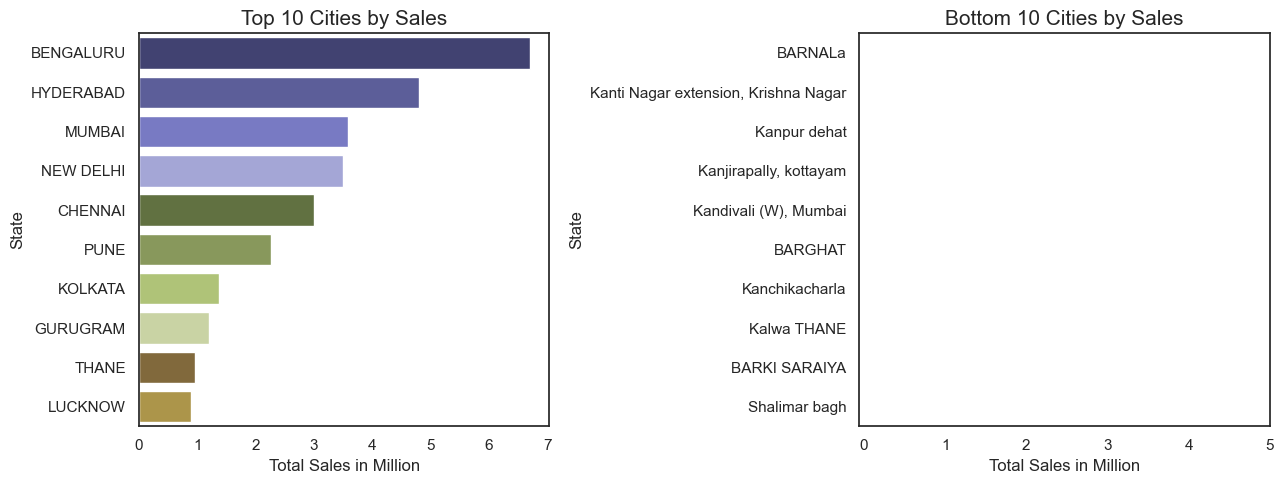

In [89]:
plt.figure(figsize=(13,5))
sns.set(style='white')
plt.subplot(1,2,1)
sns.barplot(y='ship-city',x='Total Sales in Million',data=top_sales_cities,palette='tab20b')
plt.title('Top 10 Cities by Sales',fontsize=15)
plt.xlabel('Total Sales in Million',fontsize=12)
plt.ylabel('State',fontsize=12)
plt.subplot(1,2,2)
sns.barplot(y='ship-city',x='Total Sales in Million',data=bottom_sales_cities)
plt.title('Bottom 10 Cities by Sales',fontsize=15)
plt.xlabel('Total Sales in Million',fontsize=12)
plt.ylabel('State',fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5])
plt.tight_layout()

### Key Findings:
##### Top 10 Cities by Sales:
* Bengaluru leads the sales with the highest total sales in millions.
* Hyderabad, Mumbai, New Delhi, and Chennai follow, indicating these cities are major hubs for Amazon sales.
* Other top cities include Pune, Kolkata, Gurugram, Thane, and Lucknow.
##### Bottom 10 Cities by Sales:
* Barnala and Kanti Nagar extension, Krishna Nagar have the lowest sales.
* Other cities with minimal sales include Kanpur dehat, Kanjirappally (Kottayam), Kandivali (W), Mumbai, Barghat, Kanchikacherla, Kalwa (Thane), Barki Saraiya, and Shalimar Bagh.

### Insights:
* Bengaluru, Hyderabad, Mumbai, New Delhi, and Chennai lead in sales, showing a strong customer base in these metropolitan areas.
* Cities with lower sales, especially the bottom 10, have potential for growth. Targeted marketing and better logistics could boost sales here.
* The sales gap between top and bottom cities might be due to infrastructure and logistics differences. Improving delivery infrastructure in low-performing cities could enhance sales.